# Music Machine

In [14]:
import spotipy.util as util
import spotipy
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

username = 'ninahew'
client_id ='a758a8092e3b45949388c4123f79948f'
client_secret = '9852f1ad63d64a4284bf4496e1bd2115'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'
user_id = 'spotify:user:ninahew'

from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, 
                                                                              client_secret=client_secret))

In [15]:
# psb_uri = 'spotify:artist:2ycnb8Er79LoH2AsR5ldjh'

In [16]:
psb_search = spotify.search(q='pet shop boys', type='artist')
psb_id = psb_search['artists']['items'][0]['id']
psb_id

'2ycnb8Er79LoH2AsR5ldjh'

In [22]:
df = pd.DataFrame()
filepath = "../data/PSB data.csv"
if not path.exists(filepath):
    artist = psb_id
    albums = spotify.artist_albums(artist)
    for album in albums['items']:
        tracks = spotify.album_tracks(album['id'])
        for track in tracks['items']:
                full_track = spotify.track(track['id'])
                audio_features = spotify.audio_features(track['id'])[0]
                audio_features['track_name'] = track['name']
                audio_features['album_name'] = album['name']
                audio_features['album_type'] = album['album_type']
                audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
                audio_features['release_date'] = album['release_date']
                audio_features['popularity'] = full_track['popularity']
                df = df.append(audio_features, ignore_index=True)
        df.to_csv(path_or_buf = filepath)
else:
    df = pd.read_csv(filepath)
    
df.sample(3)

,acousticness,album_name,album_type,analysis_url,artist,danceability,duration_ms,energy,id,instrumentalness,...,popularity,release_date,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence
62,0.000784,"Inner Sanctum (Live at The Royal Opera House, ...",album,https://api.spotify.com/v1/audio-analysis/1LXn...,Pet Shop Boys,0.515,343599.0,0.942,1LXnfkiRpk7sjJyKVZl5go,0.005930,...,2.0,2019-04-12,0.0643,127.238,4.0,https://api.spotify.com/v1/tracks/1LXnfkiRpk7s...,"It's a Sin (Live at The Royal Opera House, 2018)",audio_features,spotify:track:1LXnfkiRpk7sjJyKVZl5go,0.148
263,0.002690,"Pandemonium (Live at the O2 Arena, London - 21...",album,https://api.spotify.com/v1/audio-analysis/3wqY...,Pet Shop Boys,0.608,257253.0,0.993,3wqYHVfqCzXZA5W5WoLsr9,0.000994,...,21.0,2010-02-12,0.0462,117.008,4.0,https://api.spotify.com/v1/tracks/3wqYHVfqCzXZ...,Why Don't We Live Together? - Live at the O2 A...,audio_features,spotify:track:3wqYHVfqCzXZA5W5WoLsr9,0.842
126,0.313000,Elysium,album,https://api.spotify.com/v1/audio-analysis/4C6z...,Pet Shop Boys,0.673,305400.0,0.480,4C6zjyG6mOsdyNEsZBgZhe,0.214000,...,23.0,2012-09-05,0.0266,130.019,4.0,https://api.spotify.com/v1/tracks/4C6zjyG6mOsd...,Invisible,audio_features,spotify:track:4C6zjyG6mOsdyNEsZBgZhe,0.417


In [23]:
len(df)

308

In [24]:
df.columns

Index(['acousticness', 'album_name', 'album_type', 'analysis_url', 'artist',
       'danceability', 'duration_ms', 'energy', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'popularity', 'release_date',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'track_name',
       'type', 'uri', 'valence'],
      dtype='object')

In [37]:
# df.drop(columns= ['analysis_url', 'release_date', 'track_href', 'type', 'uri'], inplace = True)
# df.drop(columns='id', inplace = True)
# df.drop(columns = ['album_name','album_type', 'artist', 'time_signature', 'track_name'], inplace = True)

In [38]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.000029,0.488,268787.0,0.957,0.009040,0.0,0.554,-6.115,1.0,12.0,0.0592,124.997,0.531
1,0.219000,0.577,215333.0,0.633,0.003960,0.0,0.116,-7.920,1.0,11.0,0.0361,130.081,0.204
2,0.001990,0.575,231347.0,0.894,0.210000,8.0,0.463,-6.073,1.0,11.0,0.0391,127.010,0.320
3,0.022400,0.643,206160.0,0.736,0.000059,9.0,0.340,-6.159,0.0,14.0,0.0428,124.993,0.696
4,0.189000,0.510,300520.0,0.602,0.685000,4.0,0.118,-9.508,0.0,7.0,0.0313,130.021,0.310


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_normalized.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.000026,0.404959,0.288371,0.954600,0.009407,0.000000,0.535104,0.815564,1.0,0.260870,0.249284,0.486150,0.560992
1,0.222332,0.527548,0.193958,0.567503,0.004121,0.000000,0.073371,0.685624,1.0,0.239130,0.083811,0.539454,0.187150
2,0.002017,0.524793,0.222243,0.879331,0.218522,0.727273,0.439174,0.818588,1.0,0.239130,0.105301,0.507255,0.319767
3,0.022738,0.618457,0.177757,0.690562,0.000062,0.818182,0.309509,0.812397,0.0,0.304348,0.131805,0.486108,0.749628
4,0.191875,0.435262,0.344419,0.530466,0.712799,0.363636,0.075480,0.571305,0.0,0.152174,0.049427,0.538825,0.308334


<AxesSubplot:>

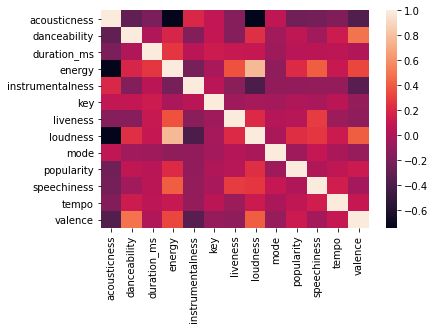

In [44]:
import seaborn as sns
sns.heatmap(df_normalized.corr())
# no real multi collinearity